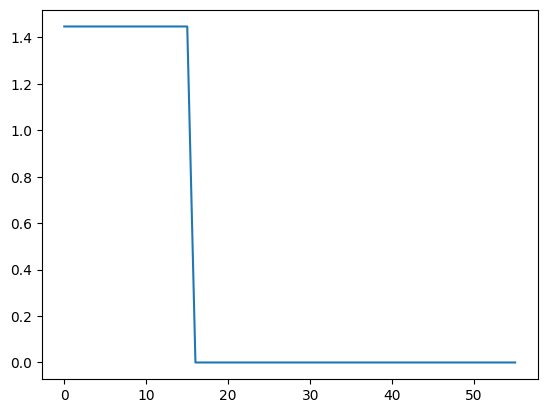

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s,win): #s,w,win,up/down
    if win:
        return lead+2*distance
    return max(s-1,0)

w=100  #fixed for now, or else must go to state
T=1000
lead=15 #fixed for now, or else when generating a project, generate random leads.
Arrivalprob=0.3 #i can also randomize it
distance=20
actions=np.linspace(0.5,2,20)

States=np.arange(lead+2*distance+1)
V={} #value function of (t,s)  :time period, state (later state will also have w)
P={} #policy    (later state will also have w )

for s in States:
    V[(T,s)]=0

for t in range(T-1,-1,-1):
    for s in States:        
        bestvalue=0
        if s>lead: #not eligible to bid
            V[(t,s)]=V[(t+1,stateTransition(s,0))]
            P[(t,s)]=0
            continue
        for a in actions:
            #expected opportunity cost in the presense of w that will randomly change
            opportunityCost=V[(t+1,stateTransition(s,0))]-V[(t+1,stateTransition(s,1))]
            value=V[(t+1,stateTransition(s,0))]+Arrivalprob*winprob(a)*(a*w-opportunityCost)
            #instead of value compute expected value, e.g., average over all possible W_{t+1}
            if value>=bestvalue:
                bestvalue=value
                V[t,s]=value
                P[t,s]=a
        


ts=np.arange(0,1000)
plt.plot(States,[P[10,s] for s in States])


In [8]:
actions

array([0.5       , 0.57894737, 0.65789474, 0.73684211, 0.81578947,
       0.89473684, 0.97368421, 1.05263158, 1.13157895, 1.21052632,
       1.28947368, 1.36842105, 1.44736842, 1.52631579, 1.60526316,
       1.68421053, 1.76315789, 1.84210526, 1.92105263, 2.        ])

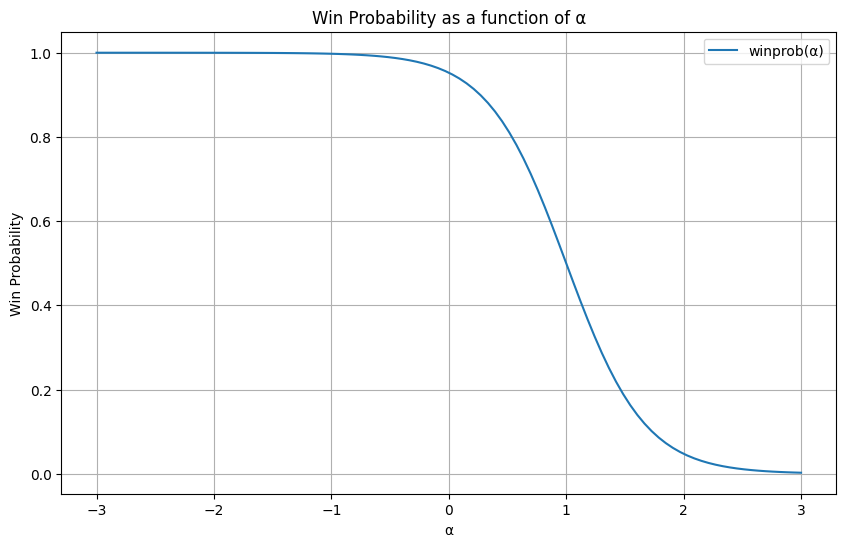

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def winprob(α):
    return 1/(1+np.exp(-3+3*α))

# Generate a range of a values
a_values = np.linspace(-3, 3, 100)

# Calculate the corresponding win probabilities
winprob_values = winprob(a_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(a_values, winprob_values, label='winprob(α)')
plt.xlabel('α')
plt.ylabel('Win Probability')
plt.title('Win Probability as a function of α')
plt.grid(True)
plt.legend()
plt.show()

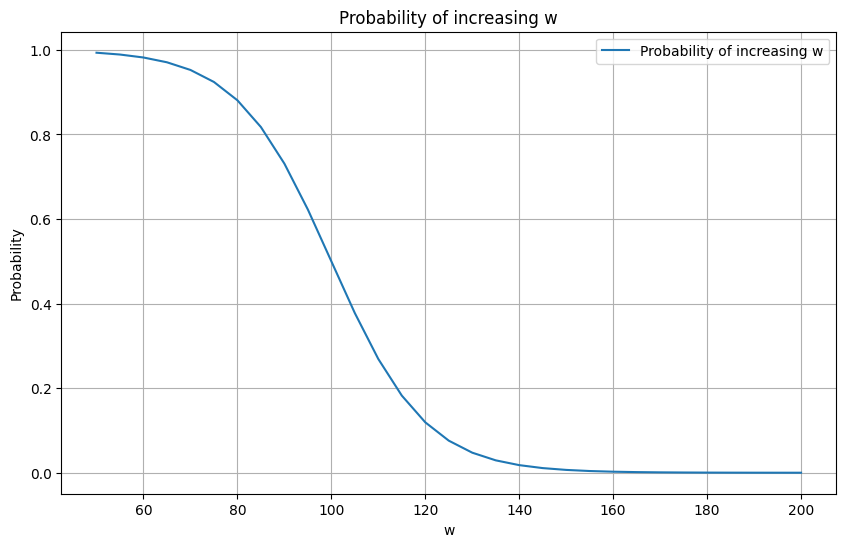

In [5]:
#sigmoid
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

w = np.linspace(50, 200, 5)

def update_w(w):
    step_size = 5

    if w > 100:
        # Higher probability to drop when w is above 100
        if np.random.rand() < 1 - sigmoid((w - 100) / 10):
            return w - step_size
        else:
            return w + step_size
    else:
        # Higher probability to rise when w is below 100
        if np.random.rand() < sigmoid((100 - w) / 10):
            return w + step_size
        else:
            return w - step_size

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define range of w
w = np.arange(50, 205, 5)  # np.arange() is used here as it allows for a step size

# Compute probabilities
prob_increase = np.where(w > 100, 1 - sigmoid((w - 100) / 10), sigmoid((100 - w) / 10))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(w, prob_increase, label='Probability of increasing w')
plt.xlabel('w')
plt.ylabel('Probability')
plt.title('Probability of increasing w')
plt.legend()
plt.grid(True)
plt.show()


# Base Code

## W can increment only with steps of 1

In [4]:
import numpy as np

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, w, distance): 
    if win:
        return lead + 2*distance
    return max(s-1,0)

def update_w(w):
    step_size = np.random.uniform(0, 1)

    if w > 100:
        # Higher probability to drop when w is above 100
        if np.random.rand() < (w - 100) / w:
            return w - step_size
        else:
            return w + step_size
    else:
        # Higher probability to rise when w is below 100
        if np.random.rand() < (100 - w) / 100:
            return w + step_size
        else:
            return w - step_size

def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

w_values = np.arange(50, 200, 1)  # possible values for w

lead=15 
Arrivalprob=0.3 
distance=20
T=1000
actions=np.linspace(0.5,2,20)

States=np.arange(lead+2*distance+1)
V={} 
P={} 

for s in States:
    for w in w_values:
        V[(T,s,w)]=0

for t in range(T-1,-1,-1):
    for s in States: 
        for w in w_values:
            w_updated = update_w(w)
            w_updated = find_closest(w_values, w_updated)
            bestvalue=0
            if s>lead: 
                V[(t,s,w)]=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]
                P[(t,s,w)]=0
                continue
            for a in actions:
                opportunityCost=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]-V[(t+1,stateTransition(s,1, w_updated, distance), w_updated)]
                value=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]+Arrivalprob*winprob(a)*(a*w-opportunityCost)
                if value>=bestvalue:
                    bestvalue=value
                    V[(t,s,w)]=value
                    P[(t,s,w)]=a



## Variable steps for W no bounds

In [3]:
import numpy as np

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, w, distance): 
    if win:
        return lead + 2*distance
    return max(s-1,0)

def update_w(w):
    step_size = np.random.randint(0, 11)  # Generates an integer between 1 and 10

    if w > 100:
        # Higher probability to drop when w is above 100
        if np.random.rand() < (w - 100) / w:
            return w - step_size
        else:
            return w + step_size
    else:
        # Higher probability to rise when w is below 100
        if np.random.rand() < (100 - w) / 100:
            return w + step_size
        else:
            return w - step_size


def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

w_values = np.arange(0, 400)  # possible values for w, might need to fix this

lead=15 
Arrivalprob=0.3 
distance=20
T=1000
actions=np.linspace(0.5,2,20)

States=np.arange(lead+2*distance+1)
V={} 
P={} 

for s in States:
    for w in w_values:
        V[(T,s,w)]=0

for t in range(T-1,-1,-1):
    for s in States: 
        for w in w_values:
            w_updated = update_w(w)
            w_updated = find_closest(w_values, w_updated)
            bestvalue=0
            if s>lead: 
                V[(t,s,w)]=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]
                P[(t,s,w)]=0
                continue
            for a in actions:
                opportunityCost=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]-V[(t+1,stateTransition(s,1, w_updated, distance), w_updated)]
                value=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]+Arrivalprob*winprob(a)*(a*w-opportunityCost)
                if value>=bestvalue:
                    bestvalue=value
                    V[(t,s,w)]=value
                    P[(t,s,w)]=a

## Variable steps for W with bounds

In [5]:
import numpy as np

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, w, distance): 
    if win:
        return lead + 2*distance
    return max(s-1,0)

def update_w(w):
    step_size = np.random.randint(0, 11)  # Generates an integer between 1 and 10

    if w > 100:
        # Higher probability to drop when w is above 100
        if np.random.rand() < (w - 100) / w:
            return w - step_size
        else:
            return w + step_size
    else:
        # Higher probability to rise when w is below 100
        if np.random.rand() < (100 - w) / 100:
            return w + step_size
        else:
            return w - step_size
    
def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#w_values = np.arange(50, 200)  # possible values for w

lead=15 
Arrivalprob=0.3 
distance=20
T=1000
actions=np.linspace(0.5,2,20)

States=np.arange(lead+2*distance+1)
V={} 
P={} 

for s in States:
    for w in w_values:
        V[(T,s,w)]=0

for t in range(T-1,-1,-1):
    for s in States: 
        for w in w_values:
            w_updated = update_w(w)
            w_updated = find_closest(w_values, w_updated)
            bestvalue=0
            if s>lead: 
                V[(t,s,w)]=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]
                P[(t,s,w)]=0
                continue
            for a in actions:
                opportunityCost=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]-V[(t+1,stateTransition(s,1, w_updated, distance), w_updated)]
                value=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]+Arrivalprob*winprob(a)*(a*w-opportunityCost)
                if value>=bestvalue:
                    bestvalue=value
                    V[(t,s,w)]=value
                    P[(t,s,w)]=a


# 2 Vessels

In [6]:
import numpy as np

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, w, distance): 
    if win:
        return lead + 2*distance
    return max(s-1,0)

def update_w(w):
    step_size = np.random.randint(0, 11)  # Generates an integer between 1 and 10

    if w > 100:
        # Higher probability to drop when w is above 100
        if np.random.rand() < (w - 100) / w:
            return w - step_size
        else:
            return w + step_size
    else:
        # Higher probability to rise when w is below 100
        if np.random.rand() < (100 - w) / 100:
            return w + step_size
        else:
            return w - step_size
    
def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

w_values = np.arange(90, 110)  # possible values for w

lead=15 
Arrivalprob=0.3 
distance=20
T=1000
actions=np.linspace(0.5,2,20)

States=np.arange(lead+2*distance+1)
V={} 
P={} 

for s1 in States:
    for s2 in States:
        for w in w_values:
            V[(T,s1,s2,w)]=0

for t in range(T-1,-1,-1):
    for s1 in States: 
        for s2 in States:
            for w in w_values:
                w_updated = update_w(w)
                w_updated = find_closest(w_values, w_updated)
                bestvalue=0
                if s1>lead and s2>lead: 
                    V[(t,s1,s2,w)]=V[(t+1,stateTransition(s1,0, w_updated, distance),stateTransition(s2,0, w_updated, distance), w_updated)]
                    P[(t,s1,s2,w)]=0
                    continue
                for a in actions:
                    opportunityCost=V[(t+1,stateTransition(s1,0, w_updated, distance),stateTransition(s2,0, w_updated, distance), w_updated)]-V[(t+1,stateTransition(s1,1, w_updated, distance),stateTransition(s2,1, w_updated, distance), w_updated)]
                    value=V[(t+1,stateTransition(s1,0, w_updated, distance),stateTransition(s2,0, w_updated, distance), w_updated)]+Arrivalprob*winprob(a)*(a*w-opportunityCost)
                    if value>=bestvalue:
                        bestvalue=value
                        V[(t,s1,s2,w)]=value
                        P[(t,s1,s2,w)]=a


# 2 Destination Ports

In [7]:
import numpy as np

def winprob(a, d):
    return 1/(1+np.exp(-3+3*a*(d+1)))

def stateTransition(s, win, w, distance, d): 
    if win:
        return lead + 2*(d+1)*distance
    return max(s-1,0)

def update_w(w):
    step_size = np.random.randint(0, 11)  # Generates an integer between 1 and 10

    if w > 100:
        # Higher probability to drop when w is above 100
        if np.random.rand() < (w - 100) / w:
            return w - step_size
        else:
            return w + step_size
    else:
        # Higher probability to rise when w is below 100
        if np.random.rand() < (100 - w) / 100:
            return w + step_size
        else:
            return w - step_size
    
def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

w_values = np.arange(50, 200)  # possible values for w

lead=15 
Arrivalprob=0.3 
distance=20
T=1000
offer_values=np.linspace(0.5,2,20)
destinations = np.array([0, 1])

actions = [(a, d) for a in offer_values for d in destinations]

States=np.arange(lead+2*2*distance+1)
V={} 
P={} 

for s in States:
    for w in w_values:
        V[(T,s,w)]=0

for t in range(T-1,-1,-1):
    for s in States: 
        for w in w_values:
            w_updated = update_w(w)
            w_updated = find_closest(w_values, w_updated)
            bestvalue=0
            if s>lead: 
                V[(t,s,w)]=V[(t+1,stateTransition(s,0, w_updated, distance, 0), w_updated)]
                P[(t,s,w)]=(0,0)
                continue
            for a, d in actions:
                opportunityCost=V[(t+1,stateTransition(s,0, w_updated, distance, d), w_updated)]-V[(t+1,stateTransition(s,1, w_updated, distance, d), w_updated)]
                value=V[(t+1,stateTransition(s,0, w_updated, distance, d), w_updated)]+Arrivalprob*winprob(a, d)*(a*(d+1)*w-opportunityCost)
                if value>=bestvalue:
                    bestvalue=value
                    V[(t,s,w)]=value
                    P[(t,s,w)]=(a, d)


# 2 Vessels 2 Destination Ports Variable W

In [8]:
import numpy as np

def winprob(a, d):
    return 1/(1+np.exp(-3+3*a*(d+1)))

def stateTransition(s, win, w, distance, d): 
    if win:
        return lead + 2*(d+1)*distance
    return max(s-1,0)

def update_w(w):
    step_size = np.random.randint(0, 11)  # Generates an integer between 1 and 10

    if w > 100:
        # Higher probability to drop when w is above 100
        if np.random.rand() < (w - 100) / w:
            return w - step_size
        else:
            return w + step_size
    else:
        # Higher probability to rise when w is below 100
        if np.random.rand() < (100 - w) / 100:
            return w + step_size
        else:
            return w - step_size

def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

w_values = np.arange(95, 105)  # possible values for w

lead=15 
Arrivalprob=0.3 
distance=20
T=365
offer_values=np.linspace(0.5,2,20)
destinations = np.array([0, 1])

actions = [(a, d) for a in offer_values for d in destinations]

States=np.arange(lead+2*2*distance+1)
V={} 
P={} 

for s1 in States:
    for s2 in States:
        for w in w_values:
            V[(T,s1,s2,w)]=0

for t in range(T-1,-1,-1):
    for s1 in States: 
        for s2 in States:
            for w in w_values:
                w_updated = update_w(w)
                w_updated = find_closest(w_values, w_updated)
                bestvalue=0
                if s1>lead and s2>lead: 
                    V[(t,s1,s2,w)]=V[(t+1,stateTransition(s1,0, w_updated, distance, 0),stateTransition(s2,0, w_updated, distance, 0), w_updated)]
                    P[(t,s1,s2,w)]=(0,0)
                    continue
                for a, d in actions:
                    opportunityCost=V[(t+1,stateTransition(s1,0, w_updated, distance, d),stateTransition(s2,0, w_updated, distance, d), w_updated)]-V[(t+1,stateTransition(s1,1, w_updated, distance, d),stateTransition(s2,1, w_updated, distance, d), w_updated)]
                    value=V[(t+1,stateTransition(s1,0, w_updated, distance, d),stateTransition(s2,0, w_updated, distance, d), w_updated)]+Arrivalprob*winprob(a, d)*(a*(d+1)*w-opportunityCost)
                    if value>=bestvalue:
                        bestvalue=value
                        V[(t,s1,s2,w)]=value
                        P[(t,s1,s2,w)]=(a, d)


# New tests with variable w with proper results

In [6]:
import numpy as np

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, w, distance): 
    if win:
        return lead + 2*distance
    return max(s-1,0)


def wScenaria(w):
    step_size=5
    upprob= 1/(1+np.exp(-3+3*w/100))
    downprob=1-upprob
    scenaria=[(max(min(w+15,200),50),upprob/3),
              (max(min(w+5,200),50),upprob*2/3),
             (max(min(w-5,200),50),downprob*2/3),
            (max(min(w-15,200),50),downprob*2/3)]  
    return scenaria
        

w_values = np.arange(50, 205, 5)  # possible values for w

lead=15 
Arrivalprob=0.3 
distance=20
T=1000
actions=np.linspace(0.85,0.95,16)

States=np.arange(lead+2*distance+1)
V={} 
P={} 

for s in States:
    for w in w_values:
        V[(T,s,w)]=0

for t in range(T-1,-1,-1):
    if not(t%100):
        print(t)
    for s in States: 
        for w in w_values:
            bestvalue=0
            if s>lead: 
                V[(t,s,w)]=0
                for (w_updated,p) in wScenaria(w):
                    V[(t,s,w)]+=p*V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]
                P[(t,s,w)]=0
                continue
            for a in actions:
                value=0
                for (w_updated,p) in wScenaria(w):
                    opportunityCost=V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]-V[(t+1,stateTransition(s,1, w_updated, distance), w_updated)]
                    value+=p*(V[(t+1,stateTransition(s,0, w_updated, distance), w_updated)]+Arrivalprob*winprob(a)*(a*w-opportunityCost))
                if value>=bestvalue:
                    bestvalue=value
                    V[(t,s,w)]=value
                    P[(t,s,w)]=a

900
800
700
600
500
400
300
200
100
0


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


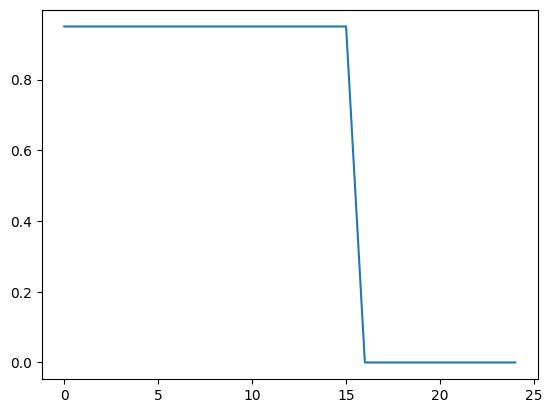

In [7]:
%pylab inline
xs=np.arange(0,25,1)
plt.plot(xs,[P[700,x,100] for x in xs])



#ws=np.arange(50,150,5)
#plt.plot(ws,[P[600,5,w] for w in ws])

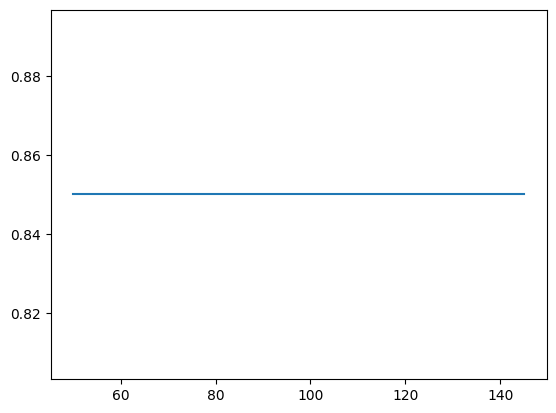

In [8]:
ws=np.arange(50,150,5)
plt.plot(ws,[P[600,5,w] for w in ws])

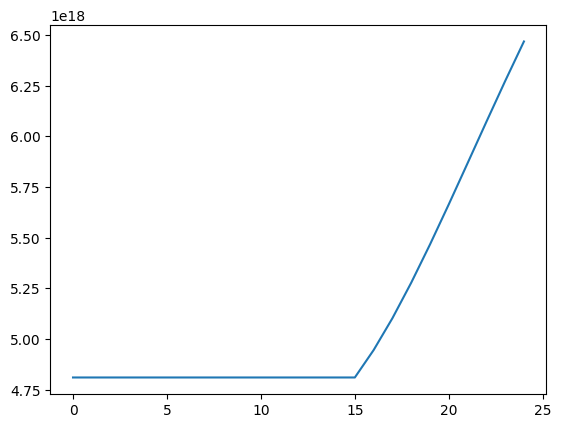

In [9]:
xs=np.arange(0,25,1)
plt.plot(xs,[V[700,x,100] for x in xs])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


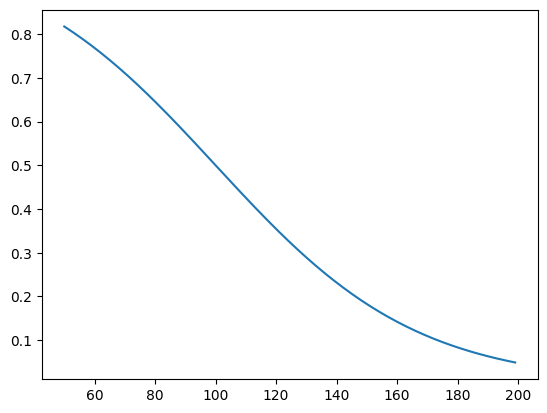

In [2]:
%pylab inline

def upprob(a):
    return 1/(1+np.exp(-3+3*a/100))

x=np.arange(50,200,1)
plt.plot(x,upprob(x))

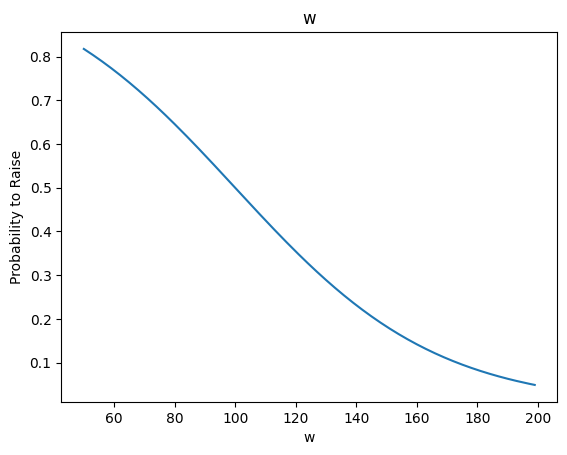

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def upprob(a):
    return 1/(1+np.exp(-3+3*a/100))

w = np.arange(50, 200, 1)
plt.plot(w, upprob(w))
plt.xlabel('w')
plt.ylabel('Probability to Raise')
plt.title('w')
plt.grid(False)
plt.show()

# RQ 3 second port

In [20]:
import numpy as np

PORT_A = 0
PORT_B = 1
DISTANCE_A = 20
DISTANCE_B = 40

def winprob(a):
    return 1 / (1 + np.exp(-3 + 3 * a))

def stateTransition(s, win, lead, p):
    if win:
        if p == PORT_A:
            return lead + 2 * DISTANCE_A
        else:
            return lead + 2 * DISTANCE_B
    else:
        return max(s-1, 0)

def wScenaria(w, p):
    if p == PORT_A:
        upprob = 1 / (1 + np.exp(-3 + 3 * w / 100))
        downprob = 1 - upprob
        return [
            (max(min(w + 15, 200), 50), upprob / 3),
            (max(min(w + 5, 200), 50), upprob * 2 / 3),
            (max(min(w - 5, 200), 50), downprob * 2 / 3),
            (max(min(w - 15, 200), 50), downprob * 2 / 3)
        ]
    else:  # PORT_B
        upprob = 1 / (1 + np.exp(-3 + 3 * w / 200))
        downprob = 1 - upprob
        return [
            (max(min(w + 30, 400), 100), upprob / 3),
            (max(min(w + 10, 400), 100), upprob * 2 / 3),
            (max(min(w - 10, 400), 100), downprob * 2 / 3),
            (max(min(w - 30, 400), 100), downprob * 2 / 3)
        ]

lead = 15
Arrivalprob = 0.3
T = 1000
actions = np.linspace(0.85, 0.95, 16)
States = np.arange(lead + 2 * DISTANCE_B + 1)  # Using DISTANCE_B as it's the longer distance
V = {}
P = {}

# Initialization
for t in range(T + 1):
    for s in States:
        for p in [PORT_A, PORT_B]:
            w_values = list(np.arange(50, 205, 5)) if p == PORT_A else list(np.arange(100, 405, 10))
            for w in w_values:
                V[(t, s, w, p)] = 0

# Value iteration
for t in range(T-1,-1,-1):
    if not(t%100):
        print(t)
    for s in States:
        for p in [PORT_A, PORT_B]:
            w_values = list(np.arange(50, 205, 5)) if p == PORT_A else list(np.arange(100, 405, 10))
            for w in w_values:
                bestvalue = 0
                
                if t == T-1:
                    V[(t, s, w, p)] = 0
                    continue
                
                if s > lead:
                    V[(t, s, w, p)] = 0
                    for (w_updated, prob) in wScenaria(w, p):
                        V[(t, s, w, p)] += prob * V[(t+1, stateTransition(s, 0, lead, p), w_updated, p)]
                    P[(t, s, w, p)] = 0
                    continue

                for a in actions:
                    value = 0
                    for (w_updated, prob) in wScenaria(w, p):
                        opportunityCost = V[(t+1, stateTransition(s, 0, lead, p), w_updated, p)] - V[(t+1, stateTransition(s, 1, lead, p), w_updated, p)]
                        value += prob * (V[(t+1, stateTransition(s, 0, lead, p), w_updated, p)] + Arrivalprob * winprob(a) * (a * w - opportunityCost))
                    if value >= bestvalue:
                        bestvalue = value
                        V[(t, s, w, p)] = value
                        P[(t, s, w, p)] = a


900
800
700
600
500
400
300
200
100
0


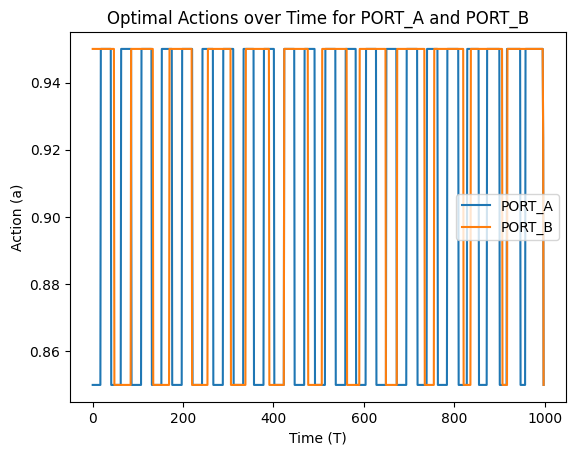

In [22]:
def plot_actions():
    # Choose specific values for state and price for visualization
    s_value = lead
    w_value_a = 100  # For PORT_A
    w_value_b = 200  # For PORT_B

    actions_a = [P.get((t, s_value, w_value_a, PORT_A), None) for t in range(T - 1)]
    actions_b = [P.get((t, s_value, w_value_b, PORT_B), None) for t in range(T - 1)]

    plt.plot(actions_a, label="PORT_A")
    plt.plot(actions_b, label="PORT_B")
    plt.xlabel("Time (T)")
    plt.ylabel("Action (a)")
    plt.legend()
    plt.title("Optimal Actions over Time for PORT_A and PORT_B")
    plt.show()

plot_actions()


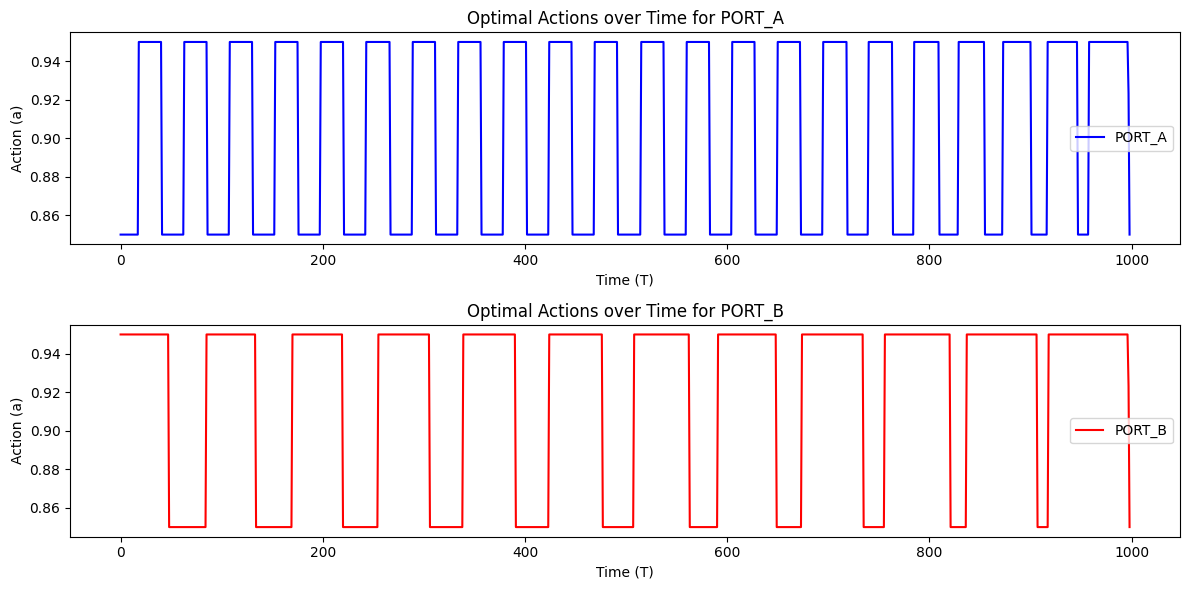

In [23]:
def plot_actions():
    # Choose specific values for state and price for visualization
    s_value = lead
    w_value_a = 100  # For PORT_A
    w_value_b = 200  # For PORT_B

    actions_a = [P.get((t, s_value, w_value_a, PORT_A), None) for t in range(T - 1)]
    actions_b = [P.get((t, s_value, w_value_b, PORT_B), None) for t in range(T - 1)]

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(actions_a, label="PORT_A", color='blue')
    plt.xlabel("Time (T)")
    plt.ylabel("Action (a)")
    plt.legend()
    plt.title("Optimal Actions over Time for PORT_A")

    plt.subplot(2, 1, 2)
    plt.plot(actions_b, label="PORT_B", color='red')
    plt.xlabel("Time (T)")
    plt.ylabel("Action (a)")
    plt.legend()
    plt.title("Optimal Actions over Time for PORT_B")

    plt.tight_layout()
    plt.show()

plot_actions()


# RQ 4 Different arrival prob

In [26]:
import numpy as np

# Constants and Port definitions
PORT_A = 0
PORT_B = 1
DISTANCE_A = 20
DISTANCE_B = 40
Arrivalprob = {PORT_A: 0.3, PORT_B: 0.15}

# Winning probability function
def winprob(a):
    return 1 / (1 + np.exp(-3 + 3 * a))

# State transition function
def stateTransition(s, win, w, p): 
    if win:
        if p == PORT_A:
            return lead + 2 * DISTANCE_A
        else:
            return lead + 2 * DISTANCE_B
    else:
        return max(s - 1, 0)

def wScenaria(w, p):
    if p == PORT_A:
        upprob = 1 / (1 + np.exp(-3 + 3 * w / 100))
        downprob = 1 - upprob
        return [
            (max(min(w + 15, 200), 50), upprob / 3),
            (max(min(w + 5, 200), 50), upprob * 2 / 3),
            (max(min(w - 5, 200), 50), downprob * 2 / 3),
            (max(min(w - 15, 200), 50), downprob / 3)
        ]
    else:  # PORT B
        upprob = 1 / (1 + np.exp(-3 + 3 * w / 200))  # No multiplication by 2
        downprob = 1 - upprob
        return [
            (max(min(w + 30, 400), 100), upprob / 3),
            (max(min(w + 10, 400), 100), upprob * 2 / 3),
            (max(min(w - 10, 400), 100), downprob * 2 / 3),
            (max(min(w - 30, 400), 100), downprob / 3)
        ]



# Variables and initialization
lead = 15
distance = 20
T = 1000
actions = np.linspace(0.85, 0.95, 16)
States = np.arange(lead + 2 * distance + 1)
V = {} 
P = {} 
w_values = list(np.arange(50, 205, 5)) + list(np.arange(210, 405, 10))

# Dynamic programming loop

for t in range(T - 1, -1, -1):
    if not(t % 100):  # Print progress every 100 iterations
        print(t)
    for s in States:
        for p in [PORT_A, PORT_B]:
            w_values_port = list(np.arange(50, 205, 5)) if p == PORT_A else list(np.arange(100, 405, 10))  # Correct w_values for each port
            for w in w_values_port:
                bestvalue = 0
                if s > lead: 
                    V[(t, s, w, p)] = 0
                    for (w_updated, prob) in wScenaria(w, p):
                        V[(t, s, w, p)] += prob * V.get((t + 1, stateTransition(s, 0, w_updated, p), w_updated, p), 0)
                    P[(t, s, w, p)] = 0
                    continue
                
                for a in actions:
                    value = 0
                    for (w_updated, prob) in wScenaria(w, p):
                        opportunityCost = V.get((t + 1, stateTransition(s, 0, w_updated, p), w_updated, p), 0) - V.get((t + 1, stateTransition(s, 1, w_updated, p), w_updated, p), 0)
                        value += prob * (V.get((t + 1, stateTransition(s, 0, w_updated, p), w_updated, p), 0) + (Arrivalprob[p] * winprob(a) * (a * w - opportunityCost)))
                    if value >= bestvalue:
                        bestvalue = value
                        V[(t, s, w, p)] = value
                        P[(t, s, w, p)] = a


900
800
700
600
500
400
300
200
100
0


# RQ 5 Different lead times

In [28]:
import numpy as np

# Constants and Port definitions
PORT_A = 0
PORT_B = 1
DISTANCE_A = 20
DISTANCE_B = 40
Arrivalprob = {PORT_A: 0.3, PORT_B: 0.15}
LEAD_A = 5
LEAD_B = 15
lead_times = {PORT_A: LEAD_A, PORT_B: LEAD_B}

# Winning probability function
def winprob(a):
    return 1 / (1 + np.exp(-3 + 3 * a))

# State transition function
def stateTransition(s, win, w, p): 
    if win:
        if p == PORT_A:
            return lead_times[p] + 2 * DISTANCE_A
        else:
            return lead_times[p] + 2 * DISTANCE_B
    else:
        return max(s - 1, 0)

# Scenario generator for next state of offer price
def wScenaria(w, p):
    if p == PORT_A:
        upprob = 1 / (1 + np.exp(-3 + 3 * w / 100))
        downprob = 1 - upprob
        return [
            (max(min(w + 15, 200), 50), upprob / 3),
            (max(min(w + 5, 200), 50), upprob * 2 / 3),
            (max(min(w - 5, 200), 50), downprob * 2 / 3),
            (max(min(w - 15, 200), 50), downprob / 3)
        ]
    else:  # PORT B
        upprob = 1 / (1 + np.exp(-3 + 3 * w / 200))  # No multiplication by 2
        downprob = 1 - upprob
        return [
            (max(min(w + 30, 400), 100), upprob / 3),
            (max(min(w + 10, 400), 100), upprob * 2 / 3),
            (max(min(w - 10, 400), 100), downprob * 2 / 3),
            (max(min(w - 30, 400), 100), downprob / 3)
        ]


# Variables and initialization
max_lead = max(lead_times.values())
distance = 20
T = 1000
actions = np.linspace(0.85, 0.95, 16)
States = np.arange(max_lead + 2 * distance + 1)
V = {} 
P = {} 
w_values = list(np.arange(50, 205, 5)) + list(np.arange(210, 405, 10))

# Dynamic programming loop
for t in range(T-1,-1,-1):
    if not(t%100):
        print(t)
    for s in States:
        for p in [PORT_A, PORT_B]:
            w_values_port = list(np.arange(50, 205, 5)) if p == PORT_A else list(np.arange(100, 405, 10))
            for w in w_values_port:
                bestvalue = 0
                if s > lead_times[p]: 
                    V[(t, s, w, p)] = 0
                    for (w_updated, prob) in wScenaria(w, p):
                        V[(t, s, w, p)] += prob * V.get((t + 1, stateTransition(s, 0, w_updated, p), w_updated, p), 0)
                    P[(t, s, w, p)] = 0
                    continue
                
                for a in actions:
                    value = 0
                    for (w_updated, prob) in wScenaria(w, p):
                        opportunityCost = V.get((t + 1, stateTransition(s, 0, w_updated, p), w_updated, p), 0) - V.get((t + 1, stateTransition(s, 1, w_updated, p), w_updated, p), 0)
                        value += prob * (V.get((t + 1, stateTransition(s, 0, w_updated, p), w_updated, p), 0) + (Arrivalprob[p] * winprob(a) * (a * w - opportunityCost)))
                    if value >= bestvalue:
                        bestvalue = value
                        V[(t, s, w, p)] = value
                        P[(t, s, w, p)] = a


900
800
700
600
500
400
300
200
100
0
